# Part 0: Load in libraries that are needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import localcider
from localcider.sequenceParameters import SequenceParameters
import re
import math
import scipy
from scipy.stats import ks_2samp
from matplotlib.patches import Rectangle
import pathlib
from matplotlib import font_manager


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)
print(font_path)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42

COLOR_MAP = dict()
COLOR_MAP['A']         = '#8c8c8c'
COLOR_MAP['CHNQST']    = '#077a15'
COLOR_MAP['DE']        = '#e23a36'
COLOR_MAP['FWY']       = '#f58220'
COLOR_MAP['G']         = '#86bd8d'
COLOR_MAP['ILMV']      = '#231f20'
COLOR_MAP['K']        = '#1725c2'
COLOR_MAP['P']         = '#c25fc9'
COLOR_MAP['R']        = '#189bd7'


# Using the global color map, we convert the colormap of amino acid
# groups, to a map against individual amino acids. This
# serves as our internal color map which is used for styling.
aacolor_map=dict()
for amino_acids in COLOR_MAP:
    for amino_acid in amino_acids:
        aacolor_map[amino_acid] = COLOR_MAP[amino_acids]

/home/research/kiersten.ruff/fonts/ARIAL.TTF


# Part 1: Load in all z-score data by species

## 1.1 - Homo sapiens

In [2]:
speciesname='sapiens'
sapiensIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_clustermap_using_centroids_w_zscores.xlsx')
print(sapiensIDRome)

print(sapiensIDRome.columns.tolist())

       Unnamed: 0 Uniprot Uniprot w IDRnum            Gene  Cluster Number  \
0               0  G5E9R7         G5E9R7_1  KRTAP4-16 IDR1              27   
1               1  Q9NRJ4         Q9NRJ4_1      TULP4 IDR1              17   
2               2  Q9NRJ4         Q9NRJ4_2      TULP4 IDR2               1   
3               3  Q9NRJ4         Q9NRJ4_3      TULP4 IDR3              27   
4               4  Q9NRJ4         Q9NRJ4_4      TULP4 IDR4              27   
...           ...     ...              ...             ...             ...   
24503       24503  Q7Z739         Q7Z739_2     YTHDF3 IDR2              11   
24504       24504  Q17RB8         Q17RB8_1     LONRF1 IDR1              29   
24505       24505  Q17RB8         Q17RB8_2     LONRF1 IDR2              24   
24506       24506  Q6P1J9         Q6P1J9_1      CDC73 IDR1              17   
24507       24507  Q6P1J9         Q6P1J9_2      CDC73 IDR2              17   

       IDR Length  Start Pos  End Pos  Full Protein Length  \
0

## 1.2 Mus musculus

In [4]:
speciesname='musculus'
musculusIDRomefull=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(musculusIDRomefull)

## Add in adjusted sequences
addseqs=pd.read_table('data/'+speciesname+'_POLR1G.tsv')
print(addseqs)

# check to make sure column names are same
if list(musculusIDRomefull.columns)==list(addseqs.columns):
    print('Same column names')
    # remove the row that contains the IDR you are adding
    addseqsacc=addseqs['Uniprot'].tolist()
    musculusIDRome = musculusIDRomefull[~musculusIDRomefull['Uniprot'].isin(addseqsacc)]
    
    # add in IDR information as new row
    musculusIDRome=musculusIDRome.append(addseqs, ignore_index=True)
print(musculusIDRome)

print(musculusIDRome[musculusIDRome['Uniprot']==addseqsacc[0]])

       Unnamed: 0       Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0       Megf9  Q8BH27      Q8BH27_1         26      200   
1               1    Q504N7_1  Q504N7      Q504N7_1         77      192   
2               2        Tgm5  Q9D7I9      Q9D7I9_1        466      506   
3               3       Stpg3  A2RSX4      A2RSX4_1        201      237   
4               4     Ocstamp  Q9D611      Q9D611_1        442      498   
...           ...         ...     ...           ...        ...      ...   
23455       23455       Efcc1  Q9JJF6      Q9JJF6_1        148      187   
23456       23456       Efcc1  Q9JJF6      Q9JJF6_2        296      396   
23457       23457       Kifbp  Q6ZPU9      Q6ZPU9_1         44       85   
23458       23458        Egfr  Q01279      Q01279_1       1093     1139   
23459       23459  D7h11orf16  Q9JJR6      Q9JJR6_1        324      402   

                                                Sequence   pol-pol   pol-hyd  \
0      AAASTASAGNVT

## 1.3 Bos taurus

In [5]:
speciesname='taurus'
taurusIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(taurusIDRome)


       Unnamed: 0     Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0  G3MZC3_1  G3MZC3      G3MZC3_1          0       95   
1               1    ZNF292  G3MYM4      G3MYM4_1        594      631   
2               2    ZNF292  G3MYM4      G3MYM4_2        818      921   
3               3    ZNF292  G3MYM4      G3MYM4_3       1261     1364   
4               4    ZNF292  G3MYM4      G3MYM4_4       1581     1644   
...           ...       ...     ...           ...        ...      ...   
22404       22404      MIA3  Q0VC16      Q0VC16_5       1411     1445   
22405       22405      MIA3  Q0VC16      Q0VC16_6       1633     1905   
22406       22406      SGK3  F1MSV4      F1MSV4_1        109      152   
22407       22407     YIPF3  Q0VC12      Q0VC12_1          0       73   
22408       22408   CCDC184  Q0VC19      Q0VC19_1        102      175   

                                                Sequence   pol-pol   pol-hyd  \
0      MPRKHKNKNHAHGKRYQVQGDTQEAQASAAAAPGEE

## 1.4 Danio rerio

In [6]:
speciesname='rerio'
rerioIDRomefull=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(rerioIDRomefull)

## Add in adjusted sequences
addseqs=pd.read_table('data/'+speciesname+'_POLR1G.tsv')
print(addseqs)

# check to make sure column names are same
if list(rerioIDRomefull.columns)==list(addseqs.columns):
    print('Same column names')
    # remove the row that contains the IDR you are adding
    addseqsacc=addseqs['Uniprot'].tolist()
    rerioIDRome = rerioIDRomefull[~rerioIDRomefull['Uniprot'].isin(addseqsacc)]
    
    # add in IDR information as new row
    rerioIDRome=rerioIDRome.append(addseqs, ignore_index=True)
print(rerioIDRome)

print(rerioIDRome[rerioIDRome['Uniprot']==addseqsacc[0]])

       Unnamed: 0       Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0    B8JLA8_1  B8JLA8      B8JLA8_1        157      196   
1               1    B8JLA8_2  B8JLA8      B8JLA8_2        217      252   
2               2    B8JLA8_3  B8JLA8      B8JLA8_3        295      357   
3               3    B8JLA8_4  B8JLA8      B8JLA8_4        428      460   
4               4  zgc:136469  B0S6H6      B0S6H6_1        232      297   
...           ...         ...     ...           ...        ...      ...   
26346       26346        eri2  Q502M8      Q502M8_1        230      323   
26347       26347    B0S7N0_1  B0S7N0      B0S7N0_1        162      253   
26348       26348    B0S7N0_2  B0S7N0      B0S7N0_2        449      503   
26349       26349    E9QCI2_1  E9QCI2      E9QCI2_1         23       55   
26350       26350   zgc:86632  A5PMJ7      A5PMJ7_1        115      154   

                                                Sequence   pol-pol   pol-hyd  \
0                KV

## 1.5 - Drosophila melanogaster

In [7]:
speciesname='melanogaster'
melanogasterIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(melanogasterIDRome)


       Unnamed: 0         Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0  Dmel\CG12236  Q9W458      Q9W458_1        195      295   
1               1  Dmel\CG12236  Q9W458      Q9W458_2        392      473   
2               2         Gorab  Q8IQQ4      Q8IQQ4_1         16      188   
3               3          blot  Q8IQQ7      Q8IQQ7_1          0      100   
4               4          blot  Q8IQQ7      Q8IQQ7_2        757      807   
...           ...           ...     ...           ...        ...      ...   
16408       16408          salr  Q9VKH3      Q9VKH3_7       1189     1267   
16409       16409          cana  Q9VKH9      Q9VKH9_1        384      426   
16410       16410          cana  Q9VKH9      Q9VKH9_2        439      484   
16411       16411          cana  Q9VKH9      Q9VKH9_3       1079     1109   
16412       16412          cana  Q9VKH9      Q9VKH9_4       1872     1931   

                                                Sequence   pol-pol   pol-hy

## 1.6 - Saccharomyces cerevisiae

In [8]:
speciesname='cerevisiae'
cerevisiaeIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(cerevisiaeIDRome)


      Unnamed: 0  Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0              0   SEC1  P30619      P30619_1        671      724   
1              1  SPO12  P17123      P17123_1          0       61   
2              2   AGP1  P25376      P25376_1          0       54   
3              3   AGP1  P25376      P25376_2         61      118   
4              4   GFD2  P25370      P25370_1          0       45   
...          ...    ...     ...           ...        ...      ...   
5550        5550   PAN1  P32521      P32521_1          0      237   
5551        5551   PAN1  P32521      P32521_2        439      498   
5552        5552   PAN1  P32521      P32521_3        515      560   
5553        5553   PAN1  P32521      P32521_4        721      772   
5554        5554   PAN1  P32521      P32521_5        976     1480   

                                               Sequence   pol-pol   pol-hyd  \
0     PVSHVHLKSQDNSPKSGTSSPKAAGSLKSEPPEKEKKRSKFSRFLK...  0.664119  0.000000   
1     MSNKASD

## 1.7 - Dictyostelium discoideum

In [9]:
speciesname='discoideum'
discoideumIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(discoideumIDRome)


       Unnamed: 0       Genes Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0        gacU  Q559A0      Q559A0_1          0       48   
1               1        gacU  Q559A0      Q559A0_2        297      332   
2               2        gacU  Q559A0      Q559A0_3        341      374   
3               3        gacU  Q559A0      Q559A0_4        389      468   
4               4        gacU  Q559A0      Q559A0_5        536      768   
...           ...         ...     ...           ...        ...      ...   
14791       14791  DDB0191982  Q54BP8      Q54BP8_3        461      508   
14792       14792        gacV  Q54BP9      Q54BP9_1         31      111   
14793       14793        gacV  Q54BP9      Q54BP9_2        113      222   
14794       14794        gacV  Q54BP9      Q54BP9_3        343      374   
14795       14795        gacV  Q54BP9      Q54BP9_4        484      520   

                                                Sequence   pol-pol   pol-hyd  \
0       MKSSKKTLTNF

## 1.8 - Xenopus tropicalis

In [10]:
speciesname='tropicalis'
tropicalisIDRomefull=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(tropicalisIDRomefull)

## Add in adjusted sequences
tmpseqs1=pd.read_table('data/'+speciesname+'_POLR1F.tsv')
tmpseqs2=pd.read_table('data/'+speciesname+'_POLR1G.tsv')
addseqs=tmpseqs1.append(tmpseqs2, ignore_index=True)
print(addseqs)

# check to make sure column names are same
if list(tropicalisIDRomefull.columns)==list(addseqs.columns):
    print('Same column names')
    # remove the row that contains the IDR you are adding
    addseqsacc=addseqs['Uniprot'].tolist()
    tropicalisIDRome = tropicalisIDRomefull[~tropicalisIDRomefull['Uniprot'].isin(addseqsacc)]
    
    # add in IDR information as new row
    tropicalisIDRome=tropicalisIDRome.append(addseqs, ignore_index=True)
print(tropicalisIDRome)

print(tropicalisIDRome[tropicalisIDRome['Uniprot']==addseqsacc[0]])

      Unnamed: 0         Genes     Uniprot Uniprot w Num  Start Pos  End Pos  \
0              0          per3  A0A6I8R304  A0A6I8R304_1          0      108   
1              1          per3  A0A6I8R304  A0A6I8R304_2        531      565   
2              2          per3  A0A6I8R304  A0A6I8R304_3        778      868   
3              3          per3  A0A6I8R304  A0A6I8R304_4        967     1015   
4              4          per3  A0A6I8R304  A0A6I8R304_5       1071     1139   
...          ...           ...         ...           ...        ...      ...   
9046        9046  LOC116409830  A0A803JUR4  A0A803JUR4_1         22     1058   
9047        9047      gpatch11      Q6DF57      Q6DF57_1          0       67   
9048        9048      gpatch11      Q6DF57      Q6DF57_2         87      124   
9049        9049      gpatch11      Q6DF57      Q6DF57_3        183      213   
9050        9050         myoz1      Q6DIU0      Q6DIU0_1        126      188   

                                       

## 1.9 Alligator mississippiensis

In [11]:
speciesname='mississippiensis'
mississippiensisIDRome=pd.read_excel('../general_data/All_'+speciesname+'_IDRs_w_zscores.xlsx')
print(mississippiensisIDRome)


       Unnamed: 0   Genes     Uniprot Uniprot w Num  Start Pos  End Pos  \
0               0    UBN2  A0A151LYV5  A0A151LYV5_1          0       49   
1               1   CEP83  A0A151LYW1  A0A151LYW1_1        678      717   
2               2   DDX47  A0A151LYZ7  A0A151LYZ7_1        338      380   
3               3    HECA  A0A151M3K2  A0A151M3K2_1        125      210   
4               4  CCDC18  A0A151M553  A0A151M553_1        104      141   
...           ...     ...         ...           ...        ...      ...   
14163       14163  ZBTB7A  A0A151NWS1  A0A151NWS1_1        196      297   
14164       14164  ZBTB7A  A0A151NWS1  A0A151NWS1_2        473      555   
14165       14165   CD6-1  A0A151NY00  A0A151NY00_1        657      698   
14166       14166  CFAP99  A0A151P991  A0A151P991_1          0       49   
14167       14167  SPOCK3  A0A151PB77  A0A151PB77_1        343      389   

                                                Sequence   pol-pol   pol-hyd  \
0      MLRKFQKEKEAL

## 1.10 - Create lists

In [12]:
speciesnames=['sapiens','musculus','taurus','rerio','melanogaster','cerevisiae','discoideum','tropicalis','mississippiensis']

speciesgenes=[]
speciesgenes.append(sapiensIDRome['Gene'].tolist())
speciesgenes.append(musculusIDRome['Genes'].tolist())
speciesgenes.append(taurusIDRome['Genes'].tolist())
speciesgenes.append(rerioIDRome['Genes'].tolist())
speciesgenes.append(melanogasterIDRome['Genes'].tolist())
speciesgenes.append(cerevisiaeIDRome['Genes'].tolist())
speciesgenes.append(discoideumIDRome['Genes'].tolist())
speciesgenes.append(tropicalisIDRome['Genes'].tolist())
speciesgenes.append(mississippiensisIDRome['Genes'].tolist())
                    
speciesuniwnum=[]
speciesuniwnum.append(sapiensIDRome['Uniprot w IDRnum'].tolist())
speciesuniwnum.append(musculusIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(taurusIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(rerioIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(melanogasterIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(cerevisiaeIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(discoideumIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(tropicalisIDRome['Uniprot w Num'].tolist())
speciesuniwnum.append(mississippiensisIDRome['Uniprot w Num'].tolist())

speciesseqs=[]
speciesseqs.append(sapiensIDRome['Sequence'].tolist())
speciesseqs.append(musculusIDRome['Sequence'].tolist())
speciesseqs.append(taurusIDRome['Sequence'].tolist())
speciesseqs.append(rerioIDRome['Sequence'].tolist())
speciesseqs.append(melanogasterIDRome['Sequence'].tolist())
speciesseqs.append(cerevisiaeIDRome['Sequence'].tolist())
speciesseqs.append(discoideumIDRome['Sequence'].tolist())
speciesseqs.append(tropicalisIDRome['Sequence'].tolist())
speciesseqs.append(mississippiensisIDRome['Sequence'].tolist())

# Part 2: Analyze POLR1F

## 2.1 - Get feature of interest data by species

In [13]:
myfeat='pos-pos'
#myfeat='R/K Ratio'

speciesfeat=[]
speciesfeat.append(sapiensIDRome[myfeat].tolist())
speciesfeat.append(musculusIDRome[myfeat].tolist())
speciesfeat.append(taurusIDRome[myfeat].tolist())
speciesfeat.append(rerioIDRome[myfeat].tolist())
speciesfeat.append(melanogasterIDRome[myfeat].tolist())
speciesfeat.append(cerevisiaeIDRome[myfeat].tolist())
speciesfeat.append(discoideumIDRome[myfeat].tolist())
speciesfeat.append(tropicalisIDRome[myfeat].tolist())
speciesfeat.append(mississippiensisIDRome[myfeat].tolist())

fullidromespecieslist=['sapiens','musculus','taurus','rerio','melanogaster','cerevisiae','discoideum','tropicalis','mississippiensis']

dfpi=pd.read_table('data/Uniprot_clustal21_POLR1F_percent_identity.txt')
print(dfpi)

dfpisapiens=dfpi[dfpi['1st species']=='sapiens']
print(dfpisapiens)

        1st species  cerevisiae   rerio  mississippiensis  musculus  sapiens  \
0        cerevisiae      100.00   33.33             32.26     25.81    19.35   
1             rerio       33.33  100.00             24.56     30.91    30.58   
2  mississippiensis       32.26   24.56            100.00     34.55    33.61   
3          musculus       25.81   30.91             34.55    100.00    57.14   
4           sapiens       19.35   30.58             33.61     57.14   100.00   
5            taurus       19.35   31.40             36.13     55.75    60.63   
6        tropicalis       18.18   25.18             35.56     31.25    30.53   
7      melanogaster       12.00   13.85             17.39     16.67    16.33   
8        discoideum       20.00   20.75             18.42     26.39    25.00   

   taurus  tropicalis  melanogaster  discoideum  
0   19.35       18.18         12.00       20.00  
1   31.40       25.18         13.85       20.75  
2   36.13       35.56         17.39       18.42  

## 2.2 - Get rank in proteome

In [14]:
myuniwnumlist=['Q3B726_1','Q78WZ7_1','A7YWA1_1','Q6PHG8_1','Q9VM72_1','P46669_2','Q55FA4_1','F7BDD1_1','A0A151MQG1_1']

speciesgeneidx=[]
speciesgenelen=[]
speciesgeneseq=[]
speciesnameswrank=[]
speciesfeatval=[]
for s in range(0,len(myuniwnumlist)):
    tmpdf=pd.DataFrame()
    tmpdf['Gene']=speciesgenes[s]
    tmpdf['Uniprot w IDRnum']=speciesuniwnum[s]
    tmpdf[myfeat]=speciesfeat[s]
    tmpids=speciesuniwnum[s]
    tmpidx=tmpids.index(myuniwnumlist[s])
    tmpseq=speciesseqs[s][tmpidx]
    speciesgenelen.append(len(tmpseq))
    speciesgeneseq.append(tmpseq)
    print(tmpseq)
    print(speciesgenes[s][tmpidx])
    
    sortedtmpdf=tmpdf.sort_values(by=myfeat, ascending=False)
    
    sorteduniwnum=sortedtmpdf['Uniprot w IDRnum'].tolist()
    pos=sorteduniwnum.index(myuniwnumlist[s])+1
    print(sortedtmpdf[myfeat].tolist()[pos-1])
    speciesfeatval.append(sortedtmpdf[myfeat].tolist()[pos-1])
    print(speciesnames[s]+': '+str(pos)+' out of '+str(len(speciesgenes[s])))
    speciesgeneidx.append(pos)
    speciesnameswrank.append(speciesnames[s]+' ('+str(pos)+' of '+str(len(speciesgenes[s]))+')')
    
    print(sortedtmpdf.head(20))

RSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL
POLR1F IDR1
8.691213073915288
sapiens: 1 out of 24508
                Gene Uniprot w IDRnum   pos-pos
14147    POLR1F IDR1         Q3B726_1  8.691213
19129    HMGXB4 IDR1         Q9UGU5_1  7.996492
24173     SCAF1 IDR4         Q9H7N4_4  7.815823
15899     NKAPL IDR2         Q5M9Q1_2  7.461727
11292    POLR1G IDR4         O15446_4  7.096490
3081      RRP1B IDR2         Q14684_2  6.997913
24018       SMO IDR2         Q99835_2  6.991308
24045   SMARCA2 IDR5         P51531_5  6.816979
15427      CHD5 IDR1         Q8TDI0_1  6.795518
22412   FAM133A IDR1         Q8N9E0_1  6.705685
2831      MED19 IDR2         A0JLT2_2  6.636272
17257      NGDN IDR3         Q8NEJ9_3  6.498646
1486       DKC1 IDR1         O60832_1  6.412870
13058      TTF1 IDR2         Q15361_2  6.354286
19288    NKAPD1 IDR1         Q6ZUT1_1  6.331971
9997      AP3D1 IDR2         O14617_2  6.2834

## 2.3 - Plot sequence features

>sapiens
RSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL
>musculus
ETVVEEVVEKTPKKKKKKKDKDTDTCGTVDSVTEVADVTDVTPQEETDIPCSDNVNDFFEEEPKKKKKKKKRHQEDQDPIFQASDSSGYQSDHNKKKKKRKHSEEANFESPKKRQ
>taurus
KCSAVPEEAPETGADEPVEKPPKKKKKKKKDREPCEVEGGATEPEDFAEVATKDEADLHVSNSVNGLWEEEPKKKKKKKKQEHQDQEPVFQGSDSSGYQSDHTKKKKKRKSEEAEFTPLVERTPKKKREK
>tropicalis
AYETPCEETAEQADDGTSDKDADALESSNMESSVQENGDVQEKAKKKRKKQKLQESLTQEAESTGDHSIVTDPNLESPGELHEDISNKERKKKKHRNVPGQNSESDAEKGVDSTILEDGNITESPVNFKPKKSKKKSKEISNSNSTSAFLNGVVEDESFSESATVEPEEMTASGGDPDKVKKKHKHSFVEQIPDSDLVTCISSEGSLTKGLVISQETPKAKKHKAKHQEHLLPGSGSGSSQSKHKKAKRHHENEPDTLAAEPKIKKRHKE
>mississippiensis
SKCPETVTEDTNRNEMPKKKHKKNGTVNCEGDSNLGEVVEDADSAVREYEEEQNPDVVNGLSHKKTKKKKKHKQENQEPVLPGSDTSDYQSNHKKEKRKKRKYCEENHELSQLAEEPKATKRKKQQMD
>rerio
QFEQKQVTAESSTEADATEDTTDSPKPKKKKKRKKDKNDTESSMEECVNNSSLQETSEHHQTTTEEDCSANGRHKEKKKKKKRDKNDTESSMDECMNNNSLQETALDTTEEDCNANERHKEKKKKKKRDKQQDSAEIVPTSDSSGYISDKTSRKRA

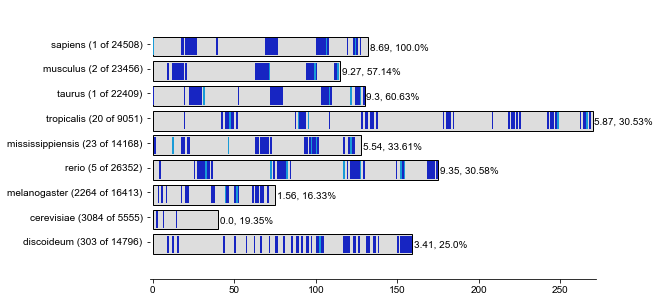

In [15]:
# can add other sequences here like Xenopus - using MobiDB-lite for disorder definition
#Xenopus - A0A1L8FVY7, alligator mississippiensis - A0A151MQG1
#extraspecies=['laevis','mississippiensis']
#extraseqs=['NMESSIQTNGDVQDKSKKKHKKQKLRESLTQEAESTGDNSIVADPDLENPVELNVETPKKERKKKKHKNVLGQNSESDAEKGLDSTSFEESINTESPVILTETKPKKSKKKGKEILHSNDTASGFLNGVVENESFSESPALEPEEMTASGGVPDKFKKKHKRSNVEQNPNSNLVSCVSSEESLTEGLAVSQETPKAKKHKSKHQEHLLPGSSQSKHKTAKRQHEEDDQDILALEPKIKKKHKK','SKCPETVTEDTNRNEMPKKKHKKNGTVNCEGDSNLGEVVEDADSAVREYEEEQNPDVVNGLSHKKTKKKKKHKQENQEPVLPGSDTSDYQSNHKKEKRKKRKYCEENHELSQLAEEPKATKRKKQQMD']
extraspecies=[]
specieslist=['sapiens','musculus','taurus','tropicalis','mississippiensis','rerio','melanogaster','cerevisiae','discoideum']

myaa=['KR']
shift=0.05
fig, ax = plt.subplots()
fig.set_size_inches(8,len(specieslist)/1.8)

lenlist=[]
ylabellist=[]
for s in range(0,len(specieslist)):
    if specieslist[s] in extraspecies:
        tmpidx=extraspecies.index(specieslist[s])
        currseq=extraseqs[tmpidx]
        currlen=len(extraseqs[tmpidx])
        ylabellist.append(specieslist[s])
    else:
        tmpidx=fullidromespecieslist.index(specieslist[s])
        currseq=speciesgeneseq[tmpidx]
        currlen=len(speciesgeneseq[tmpidx])
        ylabellist.append(speciesnameswrank[tmpidx])
        currpi=dfpisapiens[specieslist[s]].tolist()
        plt.text(currlen+1,len(specieslist)-s+0.25,str(round(speciesfeatval[tmpidx],2))+', '+str(currpi[0])+'%')
    lenlist.append(currlen)
    print('>'+specieslist[s])
    print(currseq)
    
    ax.add_patch(Rectangle((0, len(specieslist)-s), currlen, 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    for a in range(0,len(myaa)):    
        posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
        for i in posaa:
            ax.add_patch(Rectangle((i, len(specieslist)-s+shift), 1, 0.8-2*shift, facecolor=aacolor_map[currseq[i]],edgecolor = None,lw = 0))

    
ax.set_yticks(list(np.arange(len(ylabellist)+0.5, 1, -1)))
ax.set_yticklabels(ylabellist)
ax.set_xlim([-2, max(lenlist)+2])
ax.set_ylim([0, len(ylabellist)+2])
ax.spines[['left','right', 'top']].set_visible(False)

#plt.savefig('Figures/2024_02/exceptional_grammars_across_evolution/POLR1F_'+myfeat+'.pdf', transparent=True, bbox_inches = "tight")

# Part 3: Analyze POLR1G

## 3.1 - Get feature of interest data by species

In [16]:
myfeat='pos-pos'
#myfeat='R/K Ratio'

speciesfeat=[]
speciesfeat.append(sapiensIDRome[myfeat].tolist())
speciesfeat.append(musculusIDRome[myfeat].tolist())
speciesfeat.append(taurusIDRome[myfeat].tolist())
speciesfeat.append(rerioIDRome[myfeat].tolist())
speciesfeat.append(melanogasterIDRome[myfeat].tolist())
speciesfeat.append(cerevisiaeIDRome[myfeat].tolist())
speciesfeat.append(discoideumIDRome[myfeat].tolist())
speciesfeat.append(tropicalisIDRome[myfeat].tolist())
speciesfeat.append(mississippiensisIDRome[myfeat].tolist())

fullidromespecieslist=['sapiens','musculus','taurus','rerio','melanogaster','cerevisiae','discoideum','tropicalis','mississippiensis']

dfpi=pd.read_table('data/Uniprot_clustal21_POLR1G_percent_identity.txt')
print(dfpi)

dfpisapiens=dfpi[dfpi['1st species']=='sapiens']
print(dfpisapiens)

        1st species  tropicalis   rerio  cerevisiae  discoideum  \
0        tropicalis      100.00   34.48        0.00       27.27   
1             rerio       34.48  100.00        0.00       31.58   
2        cerevisiae        0.00    0.00      100.00       45.16   
3        discoideum       27.27   31.58       45.16      100.00   
4  mississippiensis        0.00   23.08        0.00        9.21   
5          musculus       29.41   25.71        4.76       20.45   
6      melanogaster         NaN  100.00         NaN        6.25   
7           sapiens       52.94   32.65       16.67       30.99   
8            taurus       28.57   30.85       20.83       29.53   

   mississippiensis  musculus  melanogaster  sapiens  taurus  
0              0.00     29.41           NaN    52.94   28.57  
1             23.08     25.71        100.00    32.65   30.85  
2              0.00      4.76           NaN    16.67   20.83  
3              9.21     20.45          6.25    30.99   29.53  
4            1

## 3.2 - Get rank in proteome

In [17]:
myuniwnumlist=['O15446_4','Q76KJ5_1','Q0VD10_2','X1WGE9_1','Q9V493_1','P47006_1','Q552C9_1','A0A6I8SD67_1','A0A151MYN9_1']
#rerio orthologs would be X1WGE9 but wasn't in initial list so would need to run nardini and then put in list

speciesgeneidx=[]
speciesgenelen=[]
speciesgeneseq=[]
speciesnameswrank=[]
speciesfeatval=[]
for s in range(0,len(myuniwnumlist)):
    if myuniwnumlist[s]==' ':
        speciesnameswrank.append(speciesnames[s])
        speciesgenelen.append(0)
        speciesgeneseq.append(' ')
        print(speciesnames[s]+' no ortholog')
    else:
        tmpdf=pd.DataFrame()
        tmpdf['Gene']=speciesgenes[s]
        tmpdf['Uniprot w IDRnum']=speciesuniwnum[s]
        tmpdf[myfeat]=speciesfeat[s]
        tmpids=speciesuniwnum[s]
        tmpidx=tmpids.index(myuniwnumlist[s])
        tmpseq=speciesseqs[s][tmpidx]
        speciesgenelen.append(len(tmpseq))
        speciesgeneseq.append(tmpseq)
        print(tmpseq)
        print(speciesgenes[s][tmpidx])

        sortedtmpdf=tmpdf.sort_values(by=myfeat, ascending=False)

        sorteduniwnum=sortedtmpdf['Uniprot w IDRnum'].tolist()
        pos=sorteduniwnum.index(myuniwnumlist[s])+1
        print(sortedtmpdf[myfeat].tolist()[pos-1])
        speciesfeatval.append(sortedtmpdf[myfeat].tolist()[pos-1])
        print(speciesnames[s]+': '+str(pos)+' out of '+str(len(speciesgenes[s])))
        speciesgeneidx.append(pos)
        speciesnameswrank.append(speciesnames[s]+' ('+str(pos)+' of '+str(len(speciesgenes[s]))+')')

        print(sortedtmpdf.head(20))

DMALGSPEMDVRKKKKKKNQQLKEPEAAGPVGTEPTVETLEPLGVLFPSTTKKRKKPKGKETFEPEDKTVKQEQINTEPLEDTVLSPTKKRKRQKGTEGMEPEEGVTVESQPQVKVEPLEEAIPLPPTKKRKKEKGQMAMMEPGTEAMEPVEPEMKPLESPGGTMAPQQPEGAKPQAQAALAAPKKKTKKEKQQDATVEPETEVVGPELPDDLEPQAAPTSTKKKKKKKERGHTVTEPIQPLEPELPGEGQPEARATPGSTKKRKKQSQESRMPETVPQEEMPGPPLNSESGEEAPTGRDKKRKQQQQQPV
POLR1G IDR4
7.096490118840024
sapiens: 5 out of 24508
                Gene Uniprot w IDRnum   pos-pos
14147    POLR1F IDR1         Q3B726_1  8.691213
19129    HMGXB4 IDR1         Q9UGU5_1  7.996492
24173     SCAF1 IDR4         Q9H7N4_4  7.815823
15899     NKAPL IDR2         Q5M9Q1_2  7.461727
11292    POLR1G IDR4         O15446_4  7.096490
3081      RRP1B IDR2         Q14684_2  6.997913
24018       SMO IDR2         Q99835_2  6.991308
24045   SMARCA2 IDR5         P51531_5  6.816979
15427      CHD5 IDR1         Q8TDI0_1  6.795518
22412   FAM133A IDR1         Q8N9E0_1  6.705685
2831      MED19 IDR2         A0JLT2_2  6.636272
17257      NGDN IDR3         Q8NEJ9_3  6.498646
1486      

## 3.3 - Plot sequence features

>sapiens
DMALGSPEMDVRKKKKKKNQQLKEPEAAGPVGTEPTVETLEPLGVLFPSTTKKRKKPKGKETFEPEDKTVKQEQINTEPLEDTVLSPTKKRKRQKGTEGMEPEEGVTVESQPQVKVEPLEEAIPLPPTKKRKKEKGQMAMMEPGTEAMEPVEPEMKPLESPGGTMAPQQPEGAKPQAQAALAAPKKKTKKEKQQDATVEPETEVVGPELPDDLEPQAAPTSTKKKKKKKERGHTVTEPIQPLEPELPGEGQPEARATPGSTKKRKKQSQESRMPETVPQEEMPGPPLNSESGEEAPTGRDKKRKQQQQQPV
>musculus
PRFSAFGGSPPVTGPGSASALRSPTSGKRKSTRKGTDASSDTQEAVNRHGAMEVKTALGNLGVSVKKRKRYFMQEEMEAKTMEPVAELPVPSATSSKKRKKSKGTETSQVEHTEPVAQTEPPEGTFLFPTKKRKRQKEADGTEEVDGIVADSQPQVIVEAQEETILLSPTKKRRKEKRQNLGMEAEMGPPGVLMVTEHSEHGLQAEVALVSPKKTKKKKGKRVGETEAALPDDFEPQGALAPSKKKERGARL
>taurus
KKEKKHQLKELEATEPLATEPVAEMLEPPGTLSPSTTRKRKKKPKESVEMVKPETGMPESKEKTVEELEFRVKREPLEETVLSPRKKRKKQKEPGEMEPVEGTTVESQLQVKTEPQEEAIPLPSSKKKKKEKRYKGMREPGMEVMEPEVKPLELTGEVMEPDLPPDVQAQSEAALGSPKKRRKKEKQQNVMMQPGTEVVEPQAEGMEPELPGAAEPQAALASTKKKKKERGHLATEPGTEMTNPQGEMMEPELPDEGQPEARADPASTKKRKKQGQKSQVPETAPQEEMPEPPLNPESGQVAPKGQERKRKKKPQQDPM
>tropicalis
HGESSVLHPIPDRLPRTVPEGLKLRYCPFGSVSPKYKRKGDLAIVHKKKKKKRKREEANVNV
>mississippie

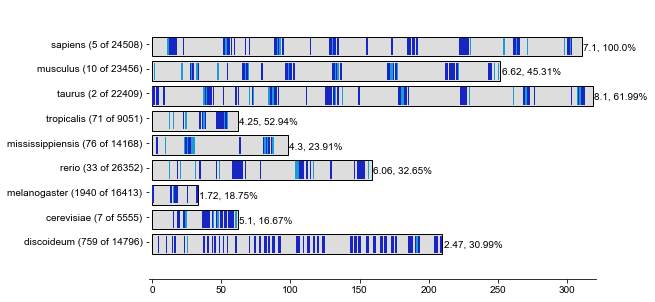

In [18]:
# can add other sequences here like Xenopus
#Xenopus - A0A8J0TKM3, Alligator mississippiensis - A0A151MYN9
#extraspecies=['laevis','mississippiensis']
#extraseqs=['GDSSAVHPIPDRQPRAVPEGLKLRYSPFGSVNPSNKRKGEEAIVHTTKKKKKKRKRVEENVNV','GSARKRKKRRRVTEELAGNLALLDTQQETPEELGPWGGGCASPKPPTQEQGPVQEPSPSHKRKRKHKRAHGVPQDDAP']
extraspecies=[]
specieslist=['sapiens','musculus','taurus','tropicalis','mississippiensis','rerio','melanogaster','cerevisiae','discoideum']

myaa=['KR']
shift=0.05
fig, ax = plt.subplots()
fig.set_size_inches(8,len(specieslist)/1.8)

lenlist=[]
ylabellist=[]
for s in range(0,len(specieslist)):
    if specieslist[s] in extraspecies:
        tmpidx=extraspecies.index(specieslist[s])
        currseq=extraseqs[tmpidx]
        currlen=len(extraseqs[tmpidx])
        ylabellist.append(specieslist[s])
    else:
        tmpidx=fullidromespecieslist.index(specieslist[s])
        currseq=speciesgeneseq[tmpidx]
        currlen=len(speciesgeneseq[tmpidx])
        ylabellist.append(speciesnameswrank[tmpidx])
        currpi=dfpisapiens[specieslist[s]].tolist()
        plt.text(currlen+1,len(specieslist)-s+0.25,str(round(speciesfeatval[tmpidx],2))+', '+str(currpi[0])+'%')
    lenlist.append(currlen)
    print('>'+specieslist[s])
    print(currseq)
    
    ax.add_patch(Rectangle((0, len(specieslist)-s), currlen, 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    for a in range(0,len(myaa)):    
        posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
        for i in posaa:
            ax.add_patch(Rectangle((i, len(specieslist)-s+shift), 1, 0.8-2*shift, facecolor=aacolor_map[currseq[i]],edgecolor = None,lw = 0))
            
    
ax.set_yticks(list(np.arange(len(ylabellist)+0.5, 1, -1)))
ax.set_yticklabels(ylabellist)
ax.set_xlim([-2, max(lenlist)+2])
ax.set_ylim([0, len(ylabellist)+2])
ax.spines[['left','right', 'top']].set_visible(False)

#plt.savefig('Figures/2024_02/exceptional_grammars_across_evolution/POLR1G_'+myfeat+'.pdf', transparent=True, bbox_inches = "tight")

# Part 4: Analyze POLR2A

## 4.1 - Get feature of interest data by species

In [19]:
myfeat='aro-aro'
#myfeat='Frac Y'

speciesfeat=[]
speciesfeat.append(sapiensIDRome[myfeat].tolist())
speciesfeat.append(musculusIDRome[myfeat].tolist())
speciesfeat.append(taurusIDRome[myfeat].tolist())
speciesfeat.append(rerioIDRome[myfeat].tolist())
speciesfeat.append(melanogasterIDRome[myfeat].tolist())
speciesfeat.append(cerevisiaeIDRome[myfeat].tolist())
speciesfeat.append(discoideumIDRome[myfeat].tolist())
speciesfeat.append(tropicalisIDRome[myfeat].tolist())
speciesfeat.append(mississippiensisIDRome[myfeat].tolist())

fullidromespecieslist=['sapiens','musculus','taurus','rerio','melanogaster','cerevisiae','discoideum','tropicalis','mississippiensis']

dfpi=pd.read_table('data/Uniprot_clustal21_POLR2A_percent_identity.txt')
print(dfpi)

dfpisapiens=dfpi[dfpi['1st species']=='sapiens']
print(dfpisapiens)

        1st species  melanogaster  mississippiensis  taurus  musculus  \
0      melanogaster        100.00             64.89   63.66     64.62   
1  mississippiensis         64.89            100.00   97.95     97.95   
2            taurus         63.66             97.95  100.00     99.30   
3          musculus         64.62             97.95   99.30    100.00   
4           sapiens         64.90             97.95   99.07     99.54   
5             rerio         64.46             96.15   97.05     97.43   
6        tropicalis         64.31             95.91   96.94     97.42   
7        cerevisiae         58.79             83.54   80.00     80.47   
8        discoideum         63.64             84.71   84.83     85.39   

   sapiens   rerio  tropicalis  cerevisiae  discoideum  
0    64.90   64.46       64.31       58.79       63.64  
1    97.95   96.15       95.91       83.54       84.71  
2    99.07   97.05       96.94       80.00       84.83  
3    99.54   97.43       97.42       80.4

## 4.2 - Get rank in proteome

In [20]:
myuniwnumlist=['P24928_1','P08775_1','G3MZY8_1','F1Q9K4_1','P04052_1','P04050_1','P35084_2','A0A6I8R7L6_1','A0A151MYR2_1']

speciesgeneidx=[]
speciesgenelen=[]
speciesgeneseq=[]
speciesnameswrank=[]
speciesfeatval=[]
for s in range(0,len(myuniwnumlist)):
    if myuniwnumlist[s]==' ':
        speciesnameswrank.append(speciesnames[s])
        speciesgenelen.append(0)
        speciesgeneseq.append(' ')
        print(speciesnames[s]+' no ortholog')
    else:
        tmpdf=pd.DataFrame()
        tmpdf['Gene']=speciesgenes[s]
        tmpdf['Uniprot w IDRnum']=speciesuniwnum[s]
        tmpdf[myfeat]=speciesfeat[s]
        tmpids=speciesuniwnum[s]
        tmpidx=tmpids.index(myuniwnumlist[s])
        tmpseq=speciesseqs[s][tmpidx]
        speciesgenelen.append(len(tmpseq))
        speciesgeneseq.append(tmpseq)
        print(tmpseq)
        print(speciesgenes[s][tmpidx])

        sortedtmpdf=tmpdf.sort_values(by=myfeat, ascending=True)

        sorteduniwnum=sortedtmpdf['Uniprot w IDRnum'].tolist()
        pos=sorteduniwnum.index(myuniwnumlist[s])+1
        print(sortedtmpdf[myfeat].tolist()[pos-1])
        speciesfeatval.append(sortedtmpdf[myfeat].tolist()[pos-1])
        print(speciesnames[s]+': '+str(pos)+' out of '+str(len(speciesgenes[s])))
        speciesgeneidx.append(pos)
        speciesnameswrank.append(speciesnames[s]+' ('+str(pos)+' of '+str(len(speciesgenes[s]))+')')

        print(sortedtmpdf.head(20))

MTPGAAGFSPSAASDASGFSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAMSPSYSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPNYTPTSPSYSPTSPSYSPTSPNYTPTSPNYSPTSPSYSPTSPSYSPTSPSYSPSSPRYTPQSPTYTPSSPSYSPSSPSYSPASPKYTPTSPSYSPSSPEYTPTSPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPAISPDDSDEEN
POLR2A IDR1
-7.88119203899924
sapiens: 1 out of 24508
                 Gene Uniprot w IDRnum   aro-aro
1655      POLR2A IDR1         P24928_1 -7.881192
22136     RBM12B IDR4         Q8IXT5_4 -6.120314
4507       GRINA IDR1         Q7Z429_1 -5.811881
17770      TAF15 IDR2         Q92804_2 -4.764679
4123       KRT10 IDR1         P13645_1 -4.112348
2683     EPS15L1 IDR5         Q9UBC2_5 -3.896617
21493       RBM6 IDR1         P78332_1 -3.769392
24011     RBMXL3 IDR4         Q8N7X1_4 -3.476712
23042      EWSR1 IDR1         Q01844_1 -3.416353
21635     MAGED1 IDR4  

## 4.3 - Plot sequence features

>sapiens
MTPGAAGFSPSAASDASGFSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAMSPSYSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPNYTPTSPSYSPTSPSYSPTSPNYTPTSPNYSPTSPSYSPTSPSYSPTSPSYSPSSPRYTPQSPTYTPSSPSYSPSSPSYSPASPKYTPTSPSYSPSSPEYTPTSPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPAISPDDSDEEN
>musculus
MTPGAAGFSPSAASDASGFSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAMSPSYSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPNYTPTSPSYSPTSPSYSPTSPNYTPTSPNYSPTSPSYSPTSPSYSPTSPSYSPSSPRYTPQSPTYTPSSPSYSPSSPSYSPTSPKYTPTSPSYSPSSPEYTPASPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPAISPDDSDEEN
>taurus
ATPAYGAWSPSVGSGMTPGAAGFSPSAASDASGFSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAMSPSYSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYS

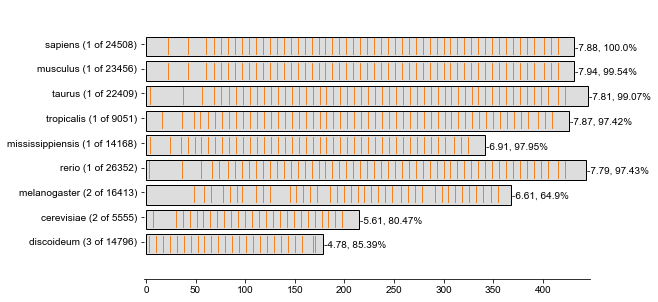

In [21]:
# can add other sequences here like Xenopus
#Xenopus - A0A1L8H4P4, Alligator mississippiensis - A0A151MYR2
#extraspecies=['laevis','mississippiensis']
#extraseqs=['MTPGAAGFSPSAASDASGFSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAMSPSYSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPSSPNYTPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPSSPRYTPQSPSYTPSSPSYSPSSPSYSPTSPKYTPTSPSYSPSSPEYTPTSPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPAISPDDSDEDN','FSPGYSPAWSPTPGSPGSPGPSSPYIPSPGGAIPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPNYTPTSPSYSPTSPSYSPTSPNYTPTSPNYSPTSPSYSPTSPSYSPTSPSYSPSSPRYTPQSPTYTPSSPSYSPSSPSYSPTSPKYTPTSPSYSPSSPEYTPTSPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPAISPDDSDDDN']
extraspecies=[]
specieslist=['sapiens','musculus','taurus','tropicalis','mississippiensis','rerio','melanogaster','cerevisiae','discoideum']

myaa=['Y']
shift=0.05
fig, ax = plt.subplots()
fig.set_size_inches(8,len(specieslist)/1.8)

lenlist=[]
ylabellist=[]
for s in range(0,len(specieslist)):
    if specieslist[s] in extraspecies:
        tmpidx=extraspecies.index(specieslist[s])
        currseq=extraseqs[tmpidx]
        currlen=len(extraseqs[tmpidx])
        ylabellist.append(specieslist[s])
    else:
        tmpidx=fullidromespecieslist.index(specieslist[s])
        currseq=speciesgeneseq[tmpidx]
        currlen=len(speciesgeneseq[tmpidx])
        ylabellist.append(speciesnameswrank[tmpidx])
        currpi=dfpisapiens[specieslist[s]].tolist()
        plt.text(currlen+1,len(specieslist)-s+0.25,str(round(speciesfeatval[tmpidx],2))+', '+str(currpi[0])+'%')
        
    lenlist.append(currlen)
    print('>'+specieslist[s])
    print(currseq)
    
    ax.add_patch(Rectangle((0, len(specieslist)-s), currlen, 0.8, edgecolor = 'black', facecolor='#dddddd'))
    
    for a in range(0,len(myaa)):    
        posaa=[i for i, ltr in enumerate(currseq) if ltr in myaa[a]]
        for i in posaa:
            ax.add_patch(Rectangle((i, len(specieslist)-s+shift), 1, 0.8-2*shift, facecolor=aacolor_map[currseq[i]],edgecolor = None,lw = 0))
            
    
ax.set_yticks(list(np.arange(len(ylabellist)+0.5, 1, -1)))
ax.set_yticklabels(ylabellist)
ax.set_xlim([-2, max(lenlist)+2])
ax.set_ylim([0, len(ylabellist)+2])
ax.spines[['left','right', 'top']].set_visible(False)

#plt.savefig('Figures/2024_02/exceptional_grammars_across_evolution/POLR2A_'+myfeat+'.pdf', transparent=True, bbox_inches = "tight")